In [13]:
import TO_sim.Q_simul as QSIM
# import TO_sim.analytical.order_sec_parameter as OSP
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [440]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [3]:
import sympy

In [14]:
omega,K,r,m = sympy.symbols('Omega K r m',real=True)

In [36]:
a = 1/sympy.sqrt(K*r*m)
b = omega/(K*r)

In [37]:
M_eR = 1/2*(-1)*(a**2/(a**4+b**2))
M_eI = 1/2*(a**2/b)*(a**2/(a**4+b**2))

In [38]:
M_eR.simplify()

-0.5*K*m*r/(Omega**2*m**2 + 1)

In [35]:
M_eI.simplify()


0.25*K*r/(4*Omega**3*m**2 + Omega)

In [21]:
IM

0.25*K*r*re(1/((K*m*r)**1.0*((K*m*r)**(-2.0) + 4*Omega**2/(K**2*r**2))))*re((K*m*r)**(-1.0))/Omega + (-0.25*K*r*im((K*m*r)**(-1.0))/Omega - 0.5)*im(1/((K*m*r)**1.0*((K*m*r)**(-2.0) + 4*Omega**2/(K**2*r**2))))

In [42]:
(a**-3 *K*r).simplify()

K*r*(K*m*r)**(3/2)

## cluste의 속도를 정하는 것

In [409]:
m = 8
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [414]:
N = 2000
K = 6
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=8000,start_p=True,seed=10)
sol = Qsimul.solve()

In [415]:
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()

In [416]:
t_mean = r_clu_info['t_mean']
r0 = r_clu_info['r_clu_mean']['0'][-1]
rp = r_clu_info['r_clu_mean']['+'][-1]
rm = r_clu_info['r_clu_mean']['-'][-1]

In [417]:
_,rptA,_,rpA,_,_ = OSP2.get_r_sec_np(K,m,F_RMu,samples=30)

In [418]:
K_ = np.linspace(0,15,1000)
I_FR0u = interpolate.interp1d(F_R0u(K_),K_)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)
shift_O = OSP2.get_shift_O(r0,rp,O_O,K,m)
O_p2 = 4/np.pi * np.sqrt(rp*K/m) - 0.3056*1/np.sqrt(K*rp*m**3)

In [419]:
t = r_clu_info['t']

(7900.0, 8000.0)

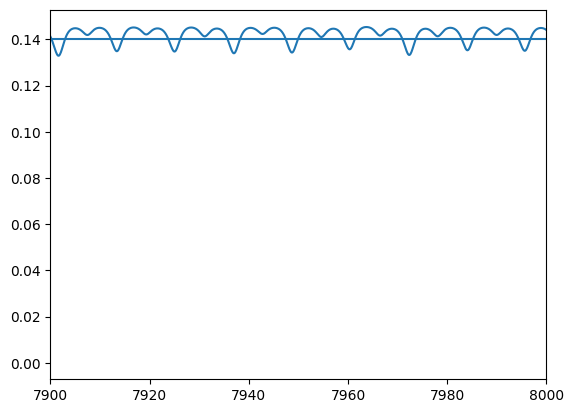

In [420]:
plt.plot(t,r_clu_info['r_clu']['+'])
plt.axhline(rpA)
plt.xlim(7900,8000)

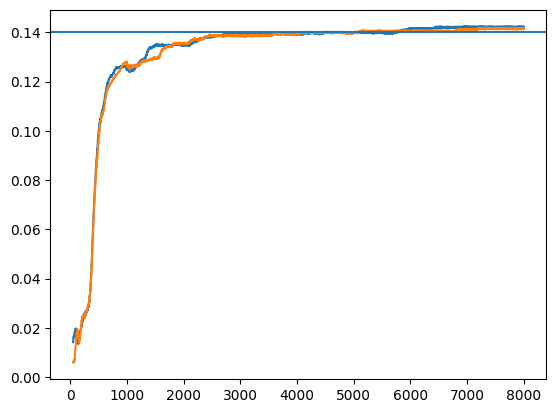

In [421]:
plt.plot(t_mean,r_clu_info['r_clu_mean']['+'])
plt.plot(t_mean,r_clu_info['r_clu_mean']['-'])
plt.axhline(rpA)
# plt.plot(t,r_clu_info['r_clu_mean']['0'])

In [422]:
O_O

0.8184039023543687

In [423]:
omega = Qsimul.omega
shift_O = OSP2.get_shift_O(r0,rpA,O_O,K,m)
F_S,F_OR = OSP2.get_shift(O_O)

In [424]:
F_S(O_p2) + O_O

1.1245114751338705

In [425]:
F_OR(omega[-1]-shift_O) 

array([1.36996161])

In [426]:
TEMP = F_S(O_p2)

In [427]:
O_C = O_O + shift_O
A = O_C*(1- 0.5 * (K*r0)**2/(O_C**2+m**2*O_C**4))

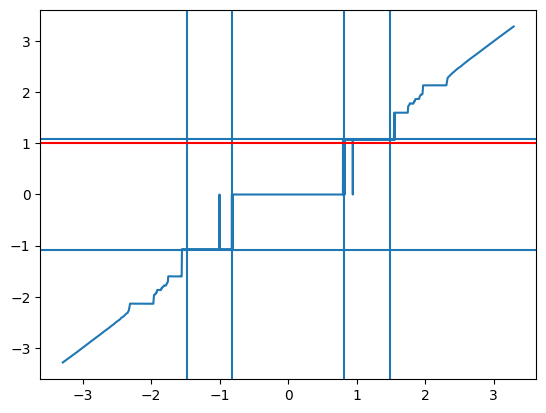

In [428]:
plt.plot(omega,cluster_info['avg_dtheta_last'])
plt.axvline(O_O)
plt.axhline(O_O+shift_O)
plt.axvline(O_O+shift_O+O_p2)
plt.axvline(-O_O)
plt.axvline(-(O_O+O_p2+shift_O))
plt.axhline(-(O_O+shift_O))
plt.axhline(A,color ='red')


## K_M space re

In [1]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import imp
imp.reload(PU);

In [3]:
# seed,N,K,m_span,t_end,start_p
args = 0,10,500,(0.0,0.1,0.1),220,True
data = PU.KM_space_ms(*args)

In [4]:
df = pd.DataFrame(columns=data.keys())

In [5]:
ms = np.arange(0,10+0.1/2,0.1)

In [22]:
N = 1000
K = 5
K_span = (0,10,0.1)
t_end = 8000
core = 8

In [23]:
index_ = 0
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 1

In [24]:
for j,m_s in enumerate(m_set):
    df = pd.DataFrame(columns=data.keys())
    for i,data in enumerate(parmap.map(PU.KM_space_ms,m_s,seed=10,N=N,K_span =K_span,t_end=t_end,start_p=True,pm_pbar=True, pm_processes=core)):
        df.loc[i] = data
    Ks = df['Ks'][0]
    S0 = np.array([*df['S0'].to_numpy()]).T
    SP = np.array([*df['S+'].to_numpy()]).T
    SM = np.array([*df['S-'].to_numpy()]).T

    R0 = np.array([*df['r0'].to_numpy()]).T
    RM0 = np.array([*df['rM'].to_numpy()]).T
    RP = np.array([*df['r+'].to_numpy()]).T
    RPT = np.array([*df['r+_total'].to_numpy()]).T
    RM = np.array([*df['r-'].to_numpy()]).T
    RMT = np.array([*df['r-_total'].to_numpy()]).T

    V0 = np.array([*df['V0'].to_numpy()]).T
    VP = np.array([*df['V+'].to_numpy()]).T
    VM = np.array([*df['V-'].to_numpy()]).T

    SIG = np.array([*df['sig'].to_numpy()]).T
    SIGP = np.array([*df['sig_+total'].to_numpy()]).T
    SIGM = np.array([*df['sig_-total'].to_numpy()]).T
    np.savez(f'./Ensembles/KM space/N = {N} K = {K} {j}',Ks=Ks,ms=m_set,S0=S0,SP=SP,SM=SM,R0=R0,RM0=RM0,RP=RP,RPT=RPT,RM=RM,RMT=RMT,SIG=SIG,V0=V0,VP=VP,VM=VM,SIGP=SIGP,SIGM=SIGM)

  0%|          | 0/8 [00:00<?, ?it/s]